# Multiple Regression

Multiple rgression adds more predictors $(X_1,X_2,..,X_k)$  with regression equation 
$$ \hat{Y} = B_0 + \sum B_k * X_k $$

$$R = r_{\hat{Y}Y}$$ 
is a correlation between the predicted scores and the observed scores

In [10]:
## a dataset with professor salaries
fs<-read.csv(file='salary.csv',header=TRUE)
# to see an 'average' professor
summary(fs)

     salary            age            years            pubs        dept  
 Min.   : 60072   Min.   :31.00   Min.   : 5.00   Min.   : 14.00   H:28  
 1st Qu.:101818   1st Qu.:44.00   1st Qu.:17.75   1st Qu.: 44.00   P:35  
 Median :133049   Median :49.00   Median :23.50   Median : 66.00   S:37  
 Mean   :133607   Mean   :50.33   Mean   :24.14   Mean   : 66.93         
 3rd Qu.:170374   3rd Qu.:59.00   3rd Qu.:31.25   3rd Qu.: 90.00         
 Max.   :199606   Max.   :67.00   Max.   :41.00   Max.   :125.00         

In [11]:
#lets see correlations ( we are interested to predict salary)
print(cor(fs[1:4]))

          salary       age     years      pubs
salary 1.0000000 0.5109749 0.6491468 0.6993987
age    0.5109749 1.0000000 0.6563766 0.5557383
years  0.6491468 0.6563766 1.0000000 0.6801977
pubs   0.6993987 0.5557383 0.6801977 1.0000000


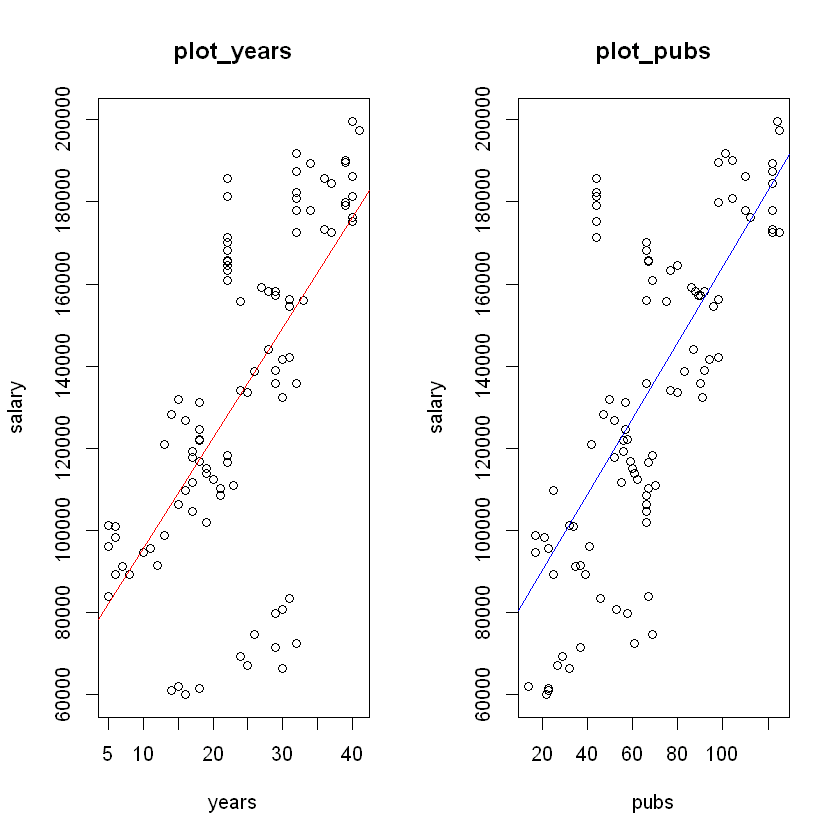

In [12]:
##visualize relationships salary ~ years, salary ~ publicaions
model_years <- lm(fs$salary ~ fs$years)
model_pubs <- lm(fs$salary ~ fs$pubs)
# Plot both enhanced scatter plots in one plot matrix of 1 by 2
par(mfrow = c(1, 2))
plot(fs$salary~fs$years, main ="plot_years", xlab = "years", ylab = "salary")
abline(model_years,col="red")
plot(fs$salary~fs$pubs, main = "plot_pubs", xlab = "pubs", ylab = "salary")
abline(model_pubs, col="blue")

In [13]:
##compare a model with 1 predictor and 2 predictor variables
model_1 <- model_years
model_2 <- lm(fs$salary ~ fs$years + fs$pubs)
r_squared <- c(summary(model_1)$r.squared, summary(model_2)$r.squared )
print(paste('how r squared evolves: ',paste(r_squared, collapbse= ' ')))

[1] "how r squared evolves:  0.421391615178524  "
[2] "how r squared evolves:  0.545127063012723  "


In [14]:
#adding more predictors might not be useful
model_3 <- lm(fs$salary ~ fs$years + fs$pubs + fs$age)
print(summary(model_3))
#observe large p-value near age predictor
#and the r-squared is only marginally increased
#-> coefficient for age tends to be insignificant


Call:
lm(formula = fs$salary ~ fs$years + fs$pubs + fs$age)

Residuals:
   Min     1Q Median     3Q    Max 
-70488 -14268   2502  13233  70413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51538.4    13726.9   3.755 0.000298 ***
fs$years      1210.0      436.5   2.772 0.006691 ** 
fs$pubs        618.9      126.5   4.894 3.98e-06 ***
fs$age         227.2      355.6   0.639 0.524444    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27010 on 96 degrees of freedom
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.5329 
F-statistic: 38.65 on 3 and 96 DF,  p-value: < 2.2e-16



#### the most significant predictor is a predictor with the biggest z-scaled coefficient

In [16]:
z_model_2<-lm(scale(fs$salary) ~ scale(fs$years) + scale(fs$pubs) )
summary(z_model_2) # it is fs$pus


Call:
lm(formula = scale(fs$salary) ~ scale(fs$years) + scale(fs$pubs))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71616 -0.36910  0.05975  0.33795  1.76115 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.444e-16  6.814e-02   0.000 1.000000    
scale(fs$years) 3.227e-01  9.342e-02   3.455 0.000819 ***
scale(fs$pubs)  4.799e-01  9.342e-02   5.137 1.44e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6814 on 97 degrees of freedom
Multiple R-squared:  0.5451,	Adjusted R-squared:  0.5357 
F-statistic: 58.12 on 2 and 97 DF,  p-value: < 2.2e-16


## Correlation matrix 

It can be computed in matrix multiplication as 

$$ R_{XX} = (SD_{XX})^-1 C_{XX} (SD_{XX})^-1 $$
where $SD_{XX}$ is a matrix of standard deviations  on diagonal  and $C_{XX}$ is a variance-covariance matrix

Example of explicit calculation below

In [2]:
#example matrix input
col1<-c(3,3,2,4,4,5,2,3,5)
col2<-c(2,2,4,3,4,4,5,3,3,5)
col3<-c(3,3,4,4,3,3,4,2,4,4)
X <- cbind(col1,col2,col3)
X

Warning message:
In cbind(col1, col2, col3): number of rows of result is not a multiple of vector length (arg 1)

col1,col2,col3
3,2,3
3,2,3
2,4,4
4,3,4
4,4,3
5,4,3
2,5,4
3,3,2
5,3,4
3,5,4


In [3]:
#identity matrix
n<-nrow(X) # number of observations per column, 10
I<-matrix(1,10,1)
#matrix of sum of columns
t_mat <- t(I) %*% X 
t_mat

col1,col2,col3
34,35,34


In [5]:
#vector of means
M <- t_mat * n^-1
M

col1,col2,col3
3.4,3.5,3.4


In [6]:
##matrix of means (10,x)
MM <- matrix(1,10,1) %*% M 
MM

col1,col2,col3
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4


In [9]:
#matrix of deviations
D <- X - MM 

In [11]:
#matrix of sum of squares and sum of cross products
S <- t(D) %*% D 

In [13]:
#variance-covariance matrix
C <- S * n^-1 #variance on diagnoal, cov off-diagonal


,col1,col2,col3
col1,1.04,-0.20,-0.06
col2,-0.20,1.05,0.30
col3,-0.06,0.30,0.44


In [15]:
#standard deviation diagonal matrix (sd on diagonal, zeros off diagonal)
SD <- diag( diag(C)^0.5,  nrow=3,ncol=3)
SD # note that SD is symmetric,  i.e. t(SD) = SD

1.019804,0.000000,0.000000
0.000000,1.024695,0.000000
0.000000,0.000000,0.663325


In [17]:
#correlation matrix 
R <- solve(SD) %*% C %*% solve(SD)  #solve(SD) is inverse of SD
R

1.00000000,-0.19138975,-0.08869686
-0.1913898,1.0000000,0.4413674
-0.08869686,0.44136741,1.00000000
